# **Task 6 - Image Processing with Aerial Images**

*Hemanth Balaji Dandi*


In [91]:
import cv2
import numpy as np
import scipy.io
import os
from matplotlib import pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import rescale, resize, downscale_local_mean
import random




## **Mounting Drive to access the Aerial Dataset-Small Village-Sensefly**

In [92]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
img_pth = '/content/drive/My Drive/Small_Village/IMG_0992.JPG'


In [94]:
#from google.colab.patches import cv2_imshow


## **Reading image from file path**

In [95]:
input_image = imread(img_pth)


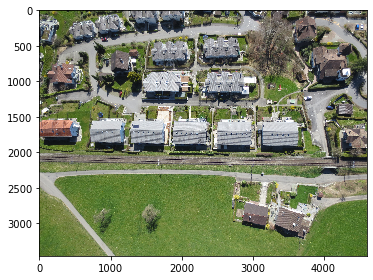

In [96]:
imshow(input_image)

## **Color Conversion (To Grayscale)**




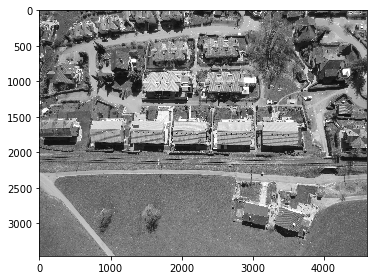

In [97]:
input_image_gray = imread(img_pth, as_gray=True) #Reading as Gray-scale
imshow(input_image_gray)

In [98]:
hsv_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV)

## **Color Conversion (To HSV)**


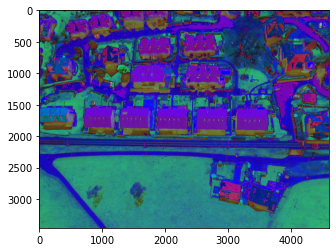

In [99]:
plt.imshow(hsv_image)

In [100]:
print(input_image.shape)

(3456, 4608, 3)


## **Image Scaling - Up and Down Sampling (using Interpolation)**

In [101]:
fig = plt.figure(figsize=(8, 20))

<Figure size 576x1440 with 0 Axes>

(None,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

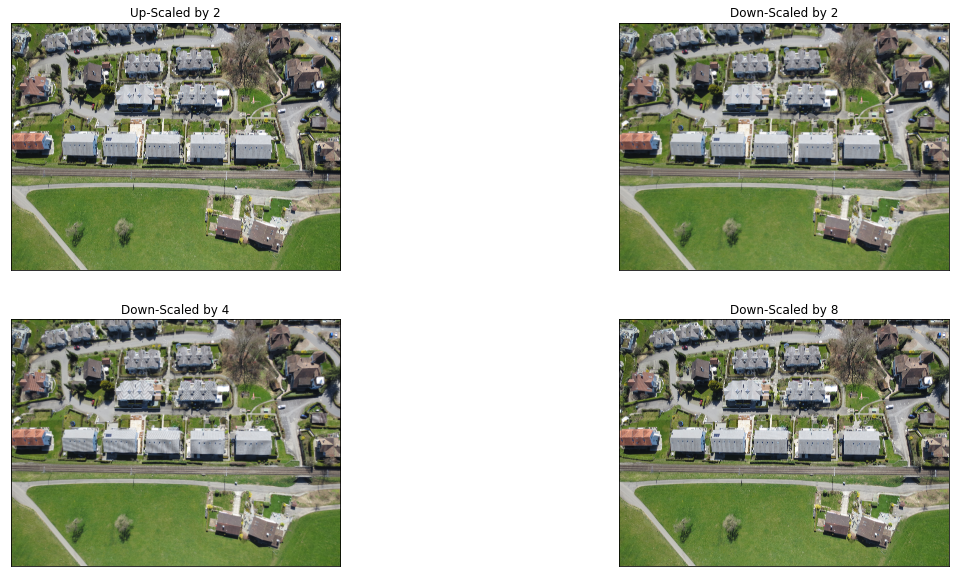

In [102]:
# Image Scaling

height, width,channels = input_image.shape


# Up-Scaled to Double of the original image
img_resized_doubled = cv2.resize(input_image, (2*width, 2*height), 
                                 interpolation=cv2.INTER_CUBIC) 
# Down-Scaled the original image to half
img_resized_halved = cv2.resize(input_image, (int(0.5*width), int(0.5*height)), 
                                interpolation=cv2.INTER_CUBIC) 
# Down-Scaled the original image to quarter
img_resized_quarter = cv2.resize(input_image, (int(0.25*width), int(0.25*height)), 
                                 interpolation=cv2.INTER_CUBIC) 
# Down-Scaled the original image by 8 times
img_resized_up_4 = cv2.resize(input_image, (width//16, height//16), 
                              interpolation=cv2.INTER_CUBIC) 



plt.figure(figsize=(20,10)) 


plt.subplot(2,2,1)
plt.imshow(img_resized_doubled,'gray')
plt.title('Up-Scaled by 2')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_resized_halved,'gray')
plt.title('Down-Scaled by 2')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(img_resized_quarter,'gray')
plt.title('Down-Scaled by 4')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(img_resized_doubled,'gray')
plt.title('Down-Scaled by 8')
plt.grid(False), plt.xticks([]), plt.yticks([])



## **Image Rotation**

([], <a list of 0 Text major ticklabel objects>)

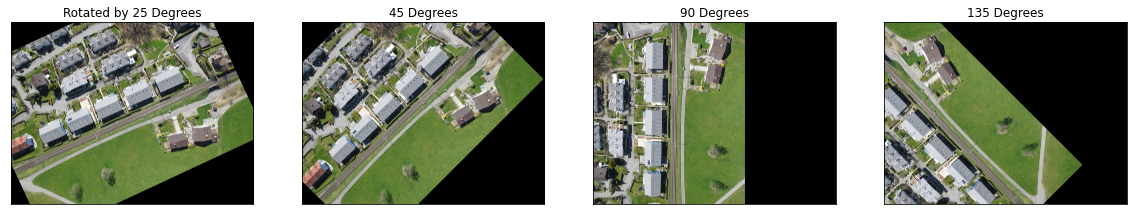

In [103]:
# Image Rotation

M_25 = cv2.getRotationMatrix2D((height/2,width/2),25,1) # Create a rotation 
                                         # matrix through rotating by 25 degrees
img_rotated_25 = cv2.warpAffine(input_image,M_25,(width,height))   # Rotate the image

M_45 = cv2.getRotationMatrix2D((height/2,width/2),45,1) # Create a rotation 
                                        # matrix through rotating by 45 degrees
img_rotated_45 = cv2.warpAffine(input_image,M_45,(width,height))   # Rotate the image

M_90 = cv2.getRotationMatrix2D((height/2,width/2),90,1) # Create a rotation 
                                        # matrix through rotating by 90 degrees
img_rotated_90 = cv2.warpAffine(input_image,M_90,(width,height))   # Rotate the image

M_135 = cv2.getRotationMatrix2D((height/2,width/2),135,1) # Create a rotation 
                                      # matrix through rotating by 135 degrees
img_rotated_135 = cv2.warpAffine(input_image,M_135,(width,height))   # Rotate the image

plt.figure(figsize=(20,10)) 


plt.subplot(1,4,1)
plt.imshow(img_rotated_25,'gray')
plt.title('Rotated by 25 Degrees')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(img_rotated_45,'gray')
plt.title('45 Degrees')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(img_rotated_90,'gray')
plt.title('90 Degrees')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(img_rotated_135,'gray')
plt.title('135 Degrees')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Bilinear Interpolation is always used by default.

# Why the need to do interpolation while rotating an image?
# We need to perform interpolation because, when rotating an image, 
# which is simply multiplying the coordinates with a component of angular theta, 
# which rounds up or down the final value, leaving pockets of space in the 
# rotated image. 
# So, in-order to fill those pockets, we use interpolation.

## **Affine Transformation**

([], <a list of 0 Text major ticklabel objects>)

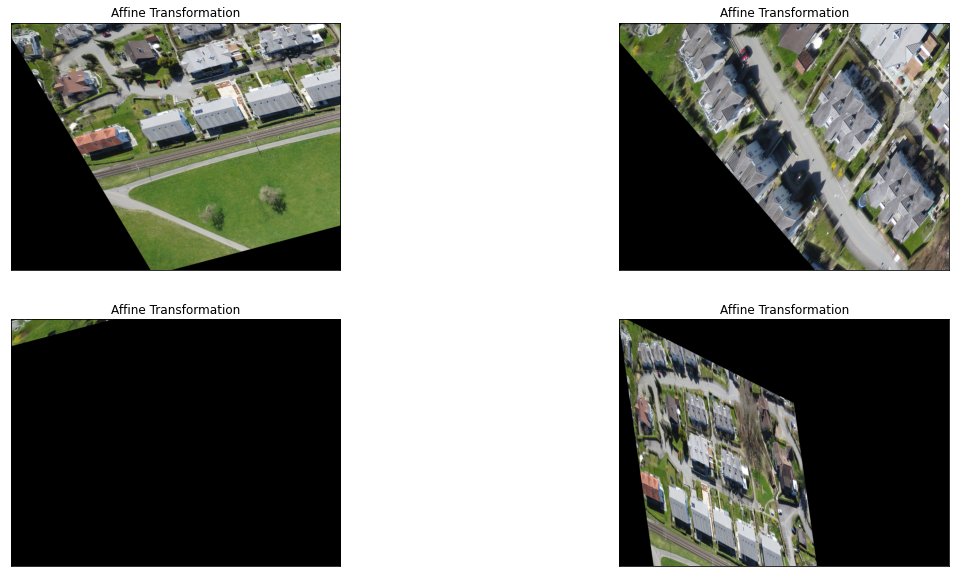

In [104]:
# Affine Transformation & Perspective Transform
# Affine transforms are a more general class of transforms including rotation, 
# translation, scaling, and shearing


pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2) # Create the affine transformation matrix
img_affine = cv2.warpAffine(input_image,M,(width,height)) # Compute the affine transform

pts3 = np.float32([[10,40],[80,100],[100,30]])
pts4 = np.float32([[10,100],[200,50],[100,250]])

M2 = cv2.getAffineTransform(pts3,pts4)# Create the affine transformation matrix
img_affine2 = cv2.warpAffine(input_image,M2,(width,height))#Compute the affine transform

pts5 = np.float32([[125,125],[200,125],[200,50]])
pts6 = np.float32([[10,100],[200,50],[100,250]])

M3 = cv2.getAffineTransform(pts5,pts6) # Create the affine transformation matrix
img_affine3 = cv2.warpAffine(input_image,M3,(width,height))#Compute the affine transform

pts7 = np.float32([[50,50],[200,50],[50,200]])
pts8 = np.float32([[20,40],[100,80],[50,250]])

M4 = cv2.getAffineTransform(pts7,pts8) # Create the affine transformation matrix
img_affine4 = cv2.warpAffine(input_image,M4,(width,height))#Compute the affine transform

plt.figure(figsize=(20,10)) 


plt.subplot(2,2,1)
plt.imshow(img_affine,'gray')
plt.title('Affine Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_affine2,'gray')
plt.title('Affine Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(img_affine3,'gray')
plt.title('Affine Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(img_affine4,'gray')
plt.title('Affine Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])

## **Perspective Transformation**

([], <a list of 0 Text major ticklabel objects>)

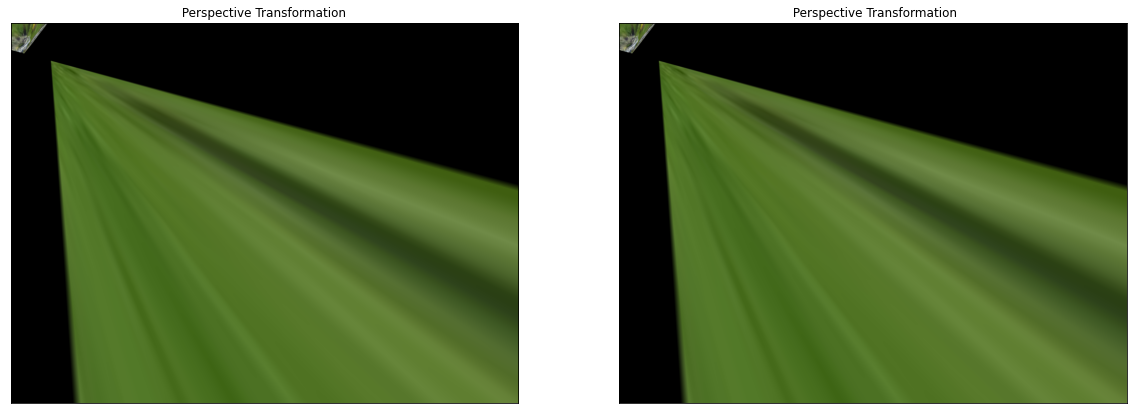

In [105]:
# Perspective Transform
ptsP1 = np.float32([[50,50],[200,50],[50,200],[200,200]])
ptsP2 = np.float32([[10,100],[200,50],[100,250],[150,200]])

# Create the Perspectivetransformation matrix
P = cv2.getPerspectiveTransform(ptsP1,ptsP2) 
img_persp = cv2.warpPerspective(input_image,P,(width,height)) # Compute the 
                                                   # Warp Perspective transform
#img3 = cv2.imread('2.jpeg',0)
height3, width3,channels = input_image.shape
gray2 = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

img_persp2 = cv2.warpPerspective(input_image,P,(width3,height3)) # Compute the 
                                                   # Warp Perspective transform
plt.figure(figsize=(20,10)) 


plt.subplot(1,2,1)
plt.imshow(img_persp, 'gray')
plt.title(' Perspective Transformation ')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_persp2)
plt.title(' Perspective Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])


## **Blurring**

([], <a list of 0 Text major ticklabel objects>)

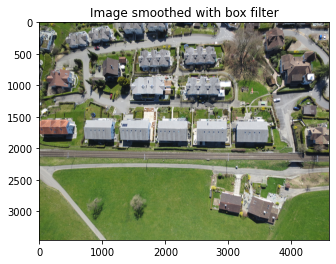

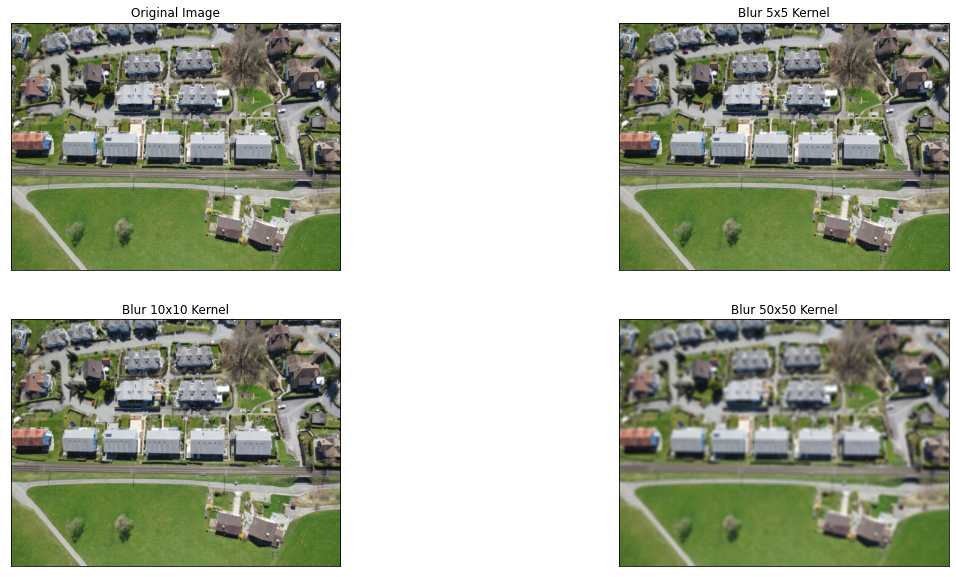

In [106]:
# Averaging with a box filter

kernel = np.ones((5,5),np.float32)/25 # The filter/kernel size is 5x5
img_smooth_average = cv2.filter2D(input_image, -1, kernel)

plt.imshow(img_smooth_average, 'gray')
plt.title('Image smoothed with box filter')


# As we increase the blur kernel size, the image becomes more and 
#        more blurred, 
#        as every pixel is averaged out with more part of the image every 
#        time the kernel-size increases.
kernel2 = np.ones((10,10),np.float32)/100 # The filter/kernel size is 10x10
img_smooth_average2 = cv2.filter2D(input_image, -1, kernel2)
kernel3 = np.ones((50,50),np.float32)/2500 # The filter/kernel size is 50x50
img_smooth_average3 = cv2.filter2D(input_image, -1, kernel3)

plt.figure(figsize=(20,10)) 


plt.subplot(2,2,1)
plt.imshow(input_image,'gray')
plt.title('Original Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_smooth_average,'gray')
plt.title('Blur 5x5 Kernel')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(img_smooth_average2,'gray')
plt.title('Blur 10x10 Kernel')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(img_smooth_average3,'gray')
plt.title('Blur 50x50 Kernel')
plt.grid(False)
plt.xticks([])
plt.yticks([])

## **Smoothing using Gaussian filter and Bilateral Filter**

([], <a list of 0 Text major ticklabel objects>)

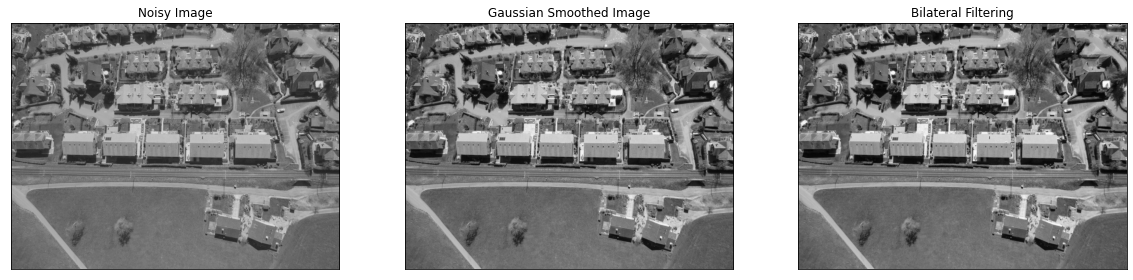

In [107]:
# Gaussian smoothing
sigma = 10.0
 # Create a noisy image by adding Gaussian noise
input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

img_noisy = input_image_gray + sigma*np.random.randn(height, width)                      
# Creating a smoothed version of the noisy image by convolving with a 
# Gaussian filter
img_gaussian = cv2.GaussianBlur(img_noisy, (5,5) , 0)                        
img_bilateral = cv2.bilateralFilter(img_noisy.astype(np.float32), 9, 75, 75) 
# Smoothing using a bilateral filter

plt.figure(figsize=(20,10)) 


plt.subplot(1,3,1), plt.imshow(img_noisy, cmap='gray')
plt.title('Noisy Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2), plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Smoothed Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3), plt.imshow(img_bilateral, cmap='gray')
plt.title('Bilateral Filtering')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# As we can see, smoothing with a Gaussian filter can help in image denoising, 
# but it also blurs the edges, 
# which is not desirable. A better approach is to use a bilateral filter. 

#  The first 8-10 pages of this document provide a good reference to Bilateral Filtering: 
#  https://people.csail.mit.edu/sparis/bf_course/course_notes.pdf
# In Bilateral Filter, according to equation, 2 Gaussian kernels are used, 
#      one for proximity and the other for pixel intensities.
# Therefore, when edges arrive in the image, that would mean there will be large 
# gradient between pixel intensity, hence that part wouldn't be blurred that 
# much, whereas when the gradient is small, it is blurred.
# This is what makes the Bilateral filter powerful,a paramter that takes into 
# account pixel intensity gradients along with pixel proximities. 
# Since noise occurs, eventhough the pixel intensity gradient between the 
# non-noise pixel and the noisy pixel is high, but the proximity is less, 
# hence it helps to get rid of the noisy pixel by averaging it out with similar 
# pixels. 
# In other words, in Bilateral filter, the pixels closest to the 'center' pixel
# gets weighted more than the ones farther, and the ones having large intensity
# gradient drop will be weighted less, hence edges are retained.

## **Computing Gradients**

(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

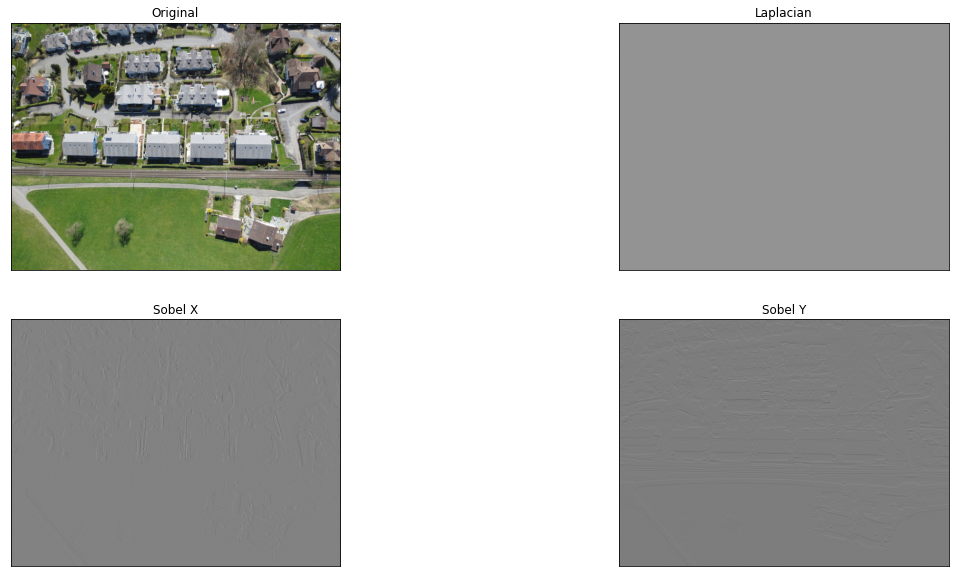

In [108]:
## GRADIENTS

laplacian = cv2.Laplacian(input_image_gray, cv2.CV_64F)
sobelx = cv2.Sobel(input_image_gray, cv2.CV_64F, 1,0,ksize=3)
sobely = cv2.Sobel(input_image_gray, cv2.CV_64F, 0,1,ksize=3)

plt.figure(figsize=(20,10)) 


plt.subplot(2,2,1),plt.imshow(input_image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

## **Edge Detection using Canny**

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

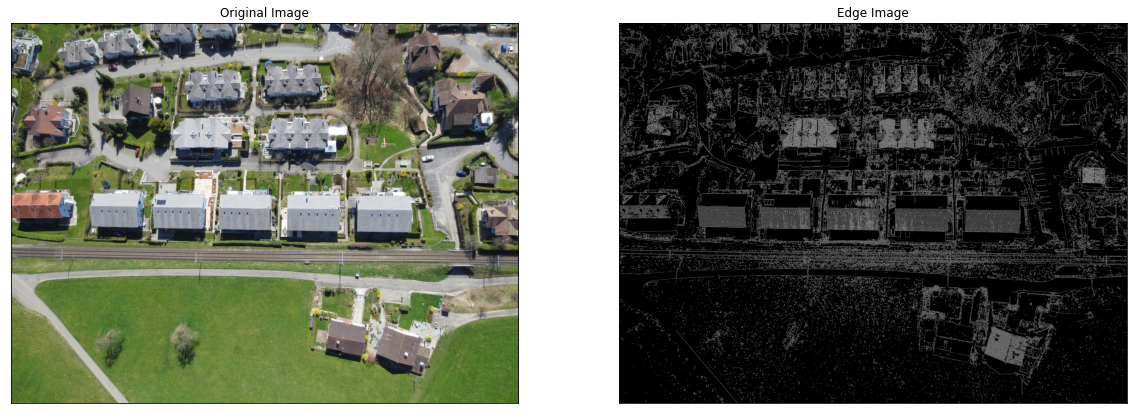

In [109]:
# Canny edge detection

edges = cv2.Canny(input_image_gray,100,200)

plt.figure(figsize=(20,10)) 


plt.subplot(121),plt.imshow(input_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

## **Denoising using simple Median Filter (After adding Salt and Pepper Noise)**

([], <a list of 0 Text major ticklabel objects>)

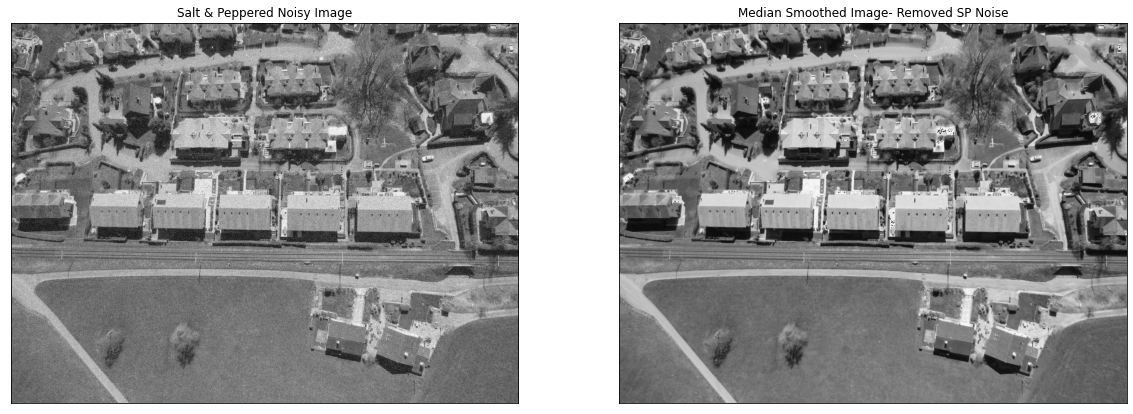

In [110]:
# Salt-and-pepper noise and Median Filtering

def salt_pepper(image):

	output = image
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			rdn = random.random()
			if rdn < 0.08:
				output[i][j] = 0
			elif rdn > 0.92:
				output[i][j] = 255
			
	return output

saltpep_noisyimg = salt_pepper(input_image_gray)

#plt.imshow(saltpep_noisyimg,'gray')
#plt.show()

# We can denoise the image with salt-and-pepper noise using "median filtering"


img_median = cv2.medianBlur(np.uint8(img_noisy),7)

plt.figure(figsize=(20,10)) 


plt.subplot(1,2,1), plt.imshow(saltpep_noisyimg, cmap='gray')
plt.title('Salt & Peppered Noisy Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2), plt.imshow(img_median, cmap='gray')
plt.title('Median Smoothed Image- Removed SP Noise')
plt.grid(False)
plt.xticks([])
plt.yticks([])

## **Prewitt and Sobel Edge Detection (Horizontal and Vertical)**

In [111]:
from skimage import filters

# prewitt kernel
prewitt_horizontal_features = filters.prewitt_h(input_image_gray)
prewitt_vertical_features = filters.prewitt_v(input_image_gray)

# Sobel Kernel
sobel_image = filters.sobel(input_image_gray)


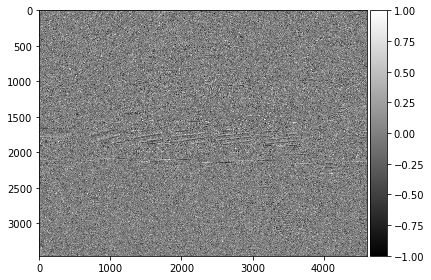

In [112]:
imshow(prewitt_horizontal_features, cmap='gray');
#imshow(prewitt_vertical_features, cmap='gray');
#imshow(sobel_image, cmap='gray');


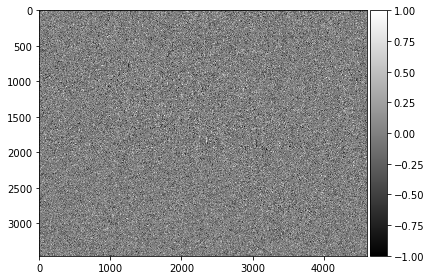

In [113]:
imshow(prewitt_vertical_features, cmap='gray');


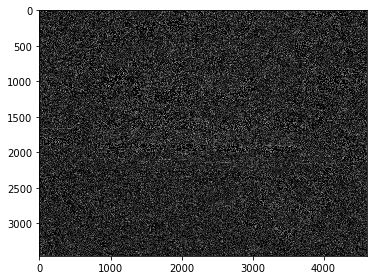

In [114]:
imshow(sobel_image, cmap='gray');
